In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
from src import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = load_img('./data/CALIB_ALEX_VEIKKA.png')
# points = select_points(img)

points = np.array([[496, 189],
       [399, 571],
       [466, 504],
       [595, 502],
       [665, 433],
       [735, 328],
       [813, 251],
       [758, 581],
       [932, 277]])

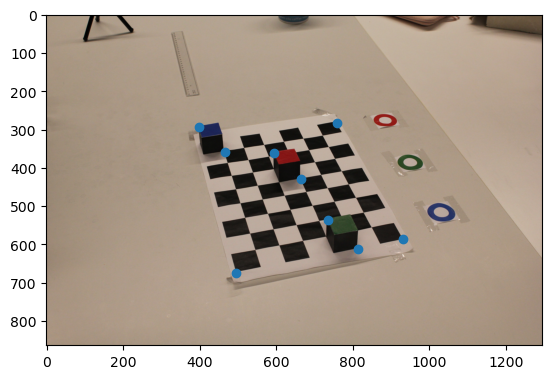

In [3]:
pts = points.copy()
pts[:, 1] = img.size[1] - pts[:, 1] - 1
plt.imshow(img)
plt.scatter(*pts.T)

In [4]:
points3 = pd.read_csv('./data/3d_points.csv', index_col=0)
points3 = points3.iloc[:, -3:].to_numpy()

M = calibrate_norm(points, points3)

In [5]:
intrinsic, extrinsic = extract_params(M)

In [6]:
%matplotlib qt

In [7]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(projection='3d')
ax.set_title("Rotation and position of the camera wrt to the cube")
ax.grid(True)
ax.scatter(*points3.T, alpha=1)
plot_frame(extrinsic, ax, name="E", l=25, s=50)

plt.legend()
plt.axis('equal')
plt.show()

